In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
def create_excel_from_text():
    # This reading text file and creating csv file code will run only one time
    # Path of the location where file is placed

    # Reading csv Data from Text file and Creating Pandas Data Frame from it,
    # Header = none is used to mention that data contains no header else read_csv() functions skip first row
    # considering its as header of data 
    # Download the dataset as a pandas DataFrame
    df = pd.read_csv("train_data.txt", header=None)

    # As the dataset comes without header, we add the different names of the columns
    df.columns = [
        'Patient Identifier',
        'Jitter in %',
        'Absolute Jitter in microseconds',
        'Jitter as relative amplitude perturbation',
        'Jitter as 5-point period perturbation',
        'Absolute Jitter difference between Jitter Cycles',
        'Shimmer in %','Absolute Shimmer in decibels (dB)',
        'Shimmer as 3 point amplitude perturbation',
        'Shimmer as 5 point amplitude perturbation',
        'Shimmer as 11 point amplitude perturbation',
        'Shimmer as Average absolute difference between amplitude of shimmer cycles',
        'Autocorrelation between NHR and HNR',
        'Noise to Harmonic Ratio (NHR)',
        'Harmonic to Noise Ratio (HNR)',
        'Median Pitch','Mean Pitch',
        'Standard Deviation of Pitch',
        'Minimum Pitch','Maximum Pitch',
        'Number of Pulses','Number of Periods',
        'Mean Period',
        'Standard Deviation of Period',
        'Fraction of unvoiced frames',
        'Number of voice breaks','Degree of voice break',
        'UPDRS',
        'Status'
    ]

    # Creating csv file from Pandas Data Frame and Storing it in location mentioned 
    df.to_csv(r'data.csv', index=None)

In [3]:
def pd_updrs(xlabel,ylabel):
    data = pd.read_csv("data.csv")  
    
    plt.scatter(data[xlabel],data[ylabel])
    plt.xticks(np.arange(0, 61, 2))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yticks(np.arange(0, 2, 1))
    plt.title(f"{xlabel} vs. {ylabel}")
    plt.show()


In [21]:
def UPDRS_VS_variable(ylabel):
    # Read the data from CSV
    data = pd.read_csv("data.csv")  
    
    xlabel='UPDRS'
    # Group by UPDRS and sum the Jitter differences
    grouped_df = data.groupby(xlabel).agg({ylabel: 'sum'}).reset_index()

    effected_Score=0
    healthy_Score=grouped_df[ylabel][0]
    for index,data in enumerate(grouped_df[ylabel]):
        if index != 0:
            effected_Score = effected_Score+data

    y_dataframe = [healthy_Score,effected_Score]

    x_dataframe = ['1','Greater Than 1']

    plt.bar(x_dataframe,y_dataframe,width=0.3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs. {ylabel}")
    plt.show()

In [26]:
def PD_VS_variable(ylabel):
    # Read the data from CSV
    data = pd.read_csv("data.csv")  
    
    xlabel='Status'
    # Group by UPDRS and sum the Jitter differences
    grouped_df = data.groupby(xlabel).agg({ylabel: 'sum'}).reset_index()

    effected_Score=0
    healthy_Score=grouped_df[ylabel][0]
    for index,data in enumerate(grouped_df[ylabel]):
        if index != 0:
            effected_Score = effected_Score+data

    y_dataframe = [healthy_Score,effected_Score]

    plt.bar(grouped_df[xlabel],y_dataframe,width=0.3)
    plt.xlabel(xlabel)
    plt.xticks(np.arange(0, 2, 1))
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs. {ylabel}")
    plt.show()

In [22]:
def graph_with_calculation(ylabel):
    data = pd.read_csv("data.csv")  

    xlabel='Patient Identifier'

    grouped_df = data.groupby(xlabel).agg({ylabel: 'sum'}).reset_index()

    plt.scatter(grouped_df[xlabel],grouped_df[ylabel])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs. {ylabel}")
    plt.show()

In [7]:
def bar_with_calculation(xlabel,ylabel):
    data = pd.read_csv("data.csv")  

    grouped_df = data.groupby(xlabel).agg({ylabel: 'sum'}).reset_index()

    plt.bar(grouped_df[xlabel],grouped_df[ylabel],width=1)
    plt.xticks(grouped_df[xlabel],grouped_df[xlabel])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs. {ylabel}")
    plt.show()

In [17]:
create_excel_from_text()

First, we find the relation of PD Indicator with Unified Parkinson Disease Rating Scale (UPDRS)

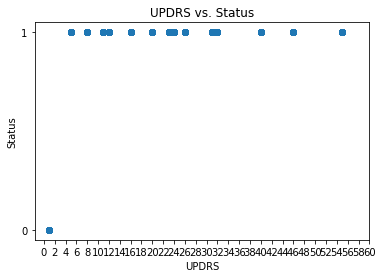

In [20]:
pd_updrs('UPDRS','Status')

As in this graph we can see the relation PD Indication with UPDRS score. According to this chart if UPDRS Score is less than or equals to 1 it shows that person isn’t affected by disease that why PD Indicator shows 0 for 1 UPDRS score. How-ever as UPDRS score increase from 1 its very clear that those patients are affected by disease which is shown in PD Indicator as value 1.
As now we know that 
UPDRS Score = 1 or PD Indicator = 0 both represent Healthy Patient
UPDRS Score > 1 or PD Indicator = 1 both represent Effected Patient 
Now we will try to find more variable which can be used to determine relation/pattern for indication of disease and then we confirm those variables also with UPDRS Score and PD Indication to confirm the relation is valid

Variables Available:
There are various variables available to find relations but first we need to know by which variables can distinguish us about Healthy and Disease effected persons, There are 3 variables which can distinguish us about person
1.	Subject Identifier because we know starting 20 patients were
2.	Unified Parkinson Disease Rating Scale (UPDRS)
3.	PD Indicator

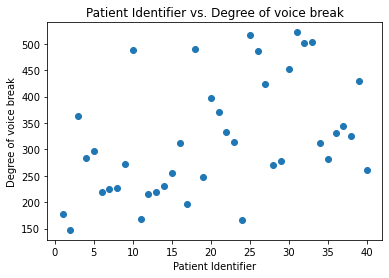

In [23]:
graph_with_calculation('Degree of voice break')

In subject identifier in which there are two types of persons first 20 are disease affected and rest 20 are healthy
In this graph we can see a pattern that for starting 20 person which are affected by disease have almost all the degree of voice breaks less than or equal to 300 except 4 cases, which mean we can guess if voice breaks for persons are less than or near to 300 there are high chances of those person being affected by disease.
Now we will explore this factor more by calculating sum of Degree of Voice Break for UPDRS Score,

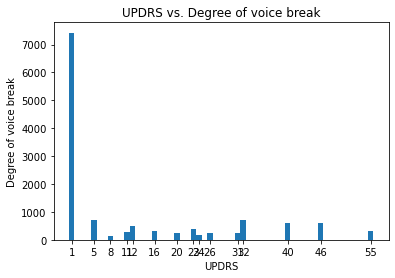

In [24]:
bar_with_calculation('UPDRS','Degree of voice break')

While seeing this graph we can say that Degree of Voice Break is high for less UPDRS Score, we should remember that less UPDRS Score was for healthy patient which seems like that Healthy persons have high degree of voice break and difference is quite high but that’s graph isn’t really what is look likes,
Actually this, graph isn’t showing the truth about Degree of voice break properly, actually its showing the Degree of voice break for Healthy person which is above 7000, while all the other scores are for disease effected one so we need to add all others scores to compare the difference properly, and we will verify every UPDRS Score graph with PD Indicator also

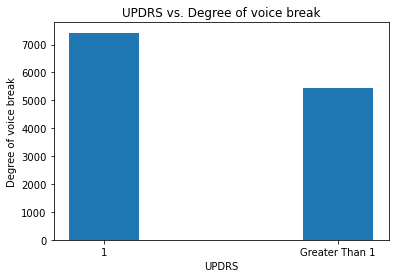

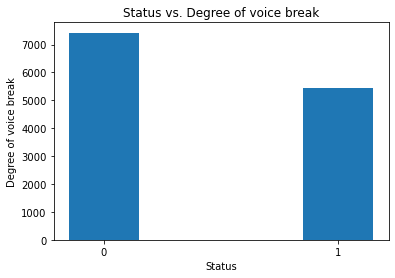

In [27]:
UPDRS_VS_variable('Degree of voice break')
PD_VS_variable('Degree of voice break')

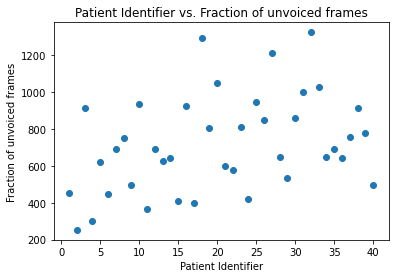

In [28]:
graph_with_calculation('Fraction of unvoiced frames')

Now in this graph we can see as we are moving towards Healthy persons fraction of unvoiced frames are going up
Now we verify Fraction of Unvoiced Frames with UPDRS and PD Indicator also

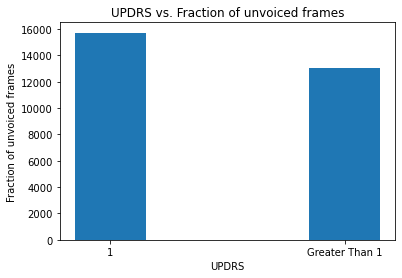

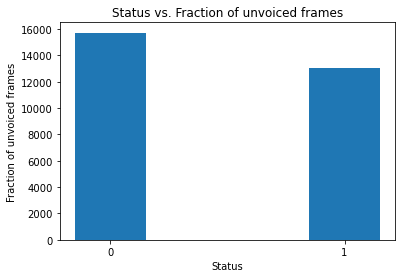

In [29]:
UPDRS_VS_variable('Fraction of unvoiced frames')
PD_VS_variable('Fraction of unvoiced frames')

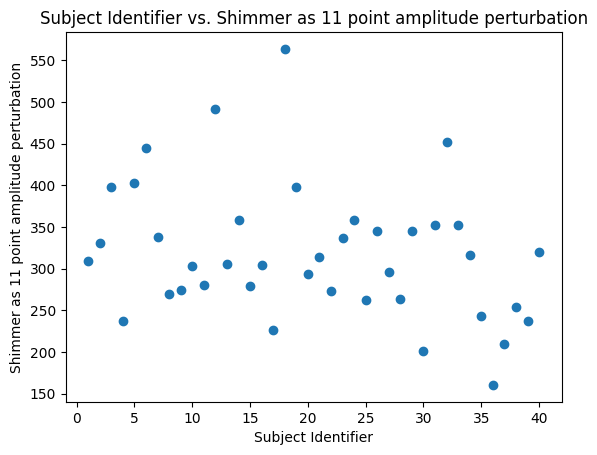

In [15]:
graph_with_calculation('Shimmer as 11 point amplitude perturbation')

Now in this graph we can see as we are moving towards Healthy persons Shimmer as 11 Point Amplitude Perturbation are going down
Now we verify Shimmer as 11 Point Amplitude Perturbation with UPDRS and PD Indicator also

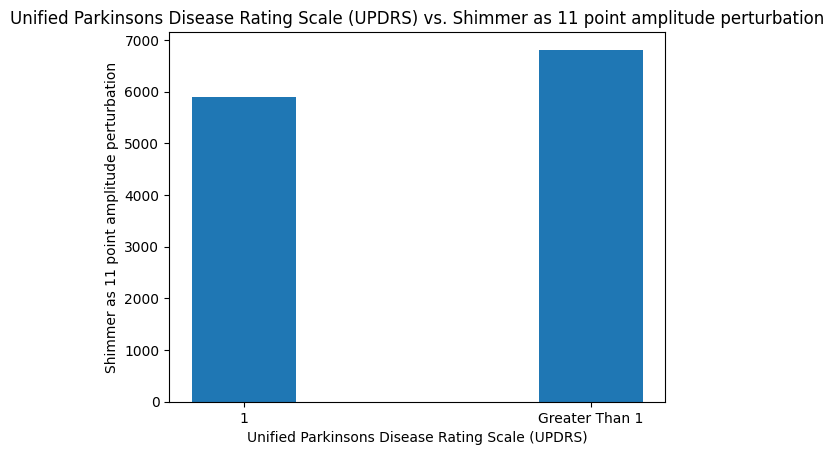

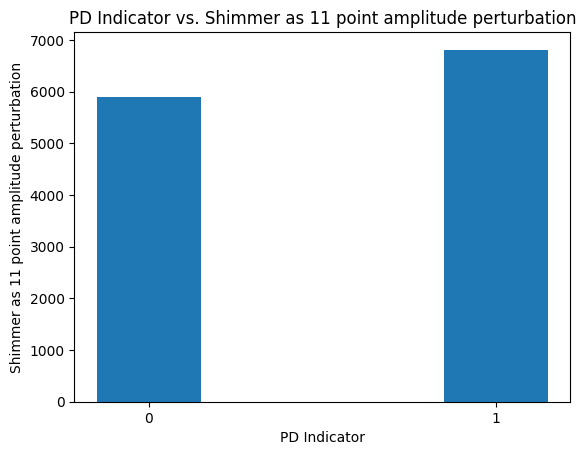

In [16]:
UPDRS_VS_variable('Shimmer as 11 point amplitude perturbation')
PD_VS_variable('Shimmer as 11 point amplitude perturbation')

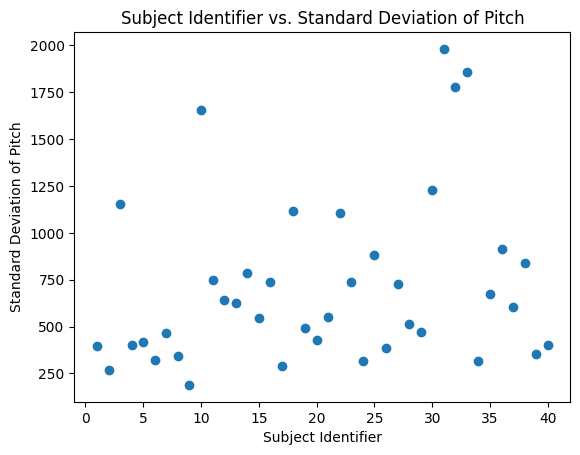

In [17]:
graph_with_calculation('Standard Deviation of Pitch')

Now in this graph we can see as we are moving towards Healthy persons Standard Deviation of Pitch are going up
Now we verify Standard Deviation of Pitch with UPDRS and PD Indicator also

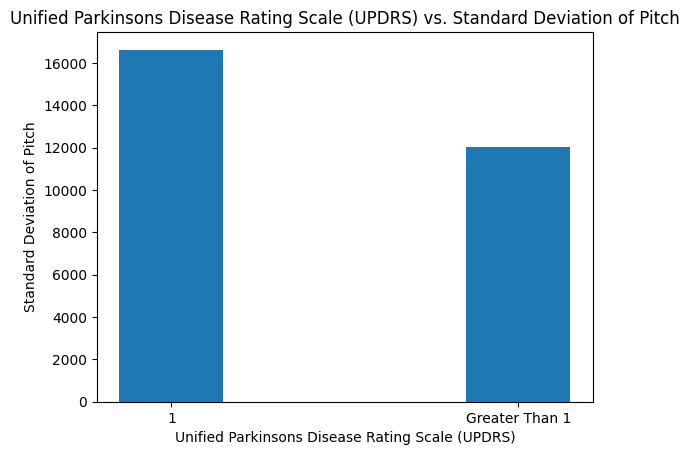

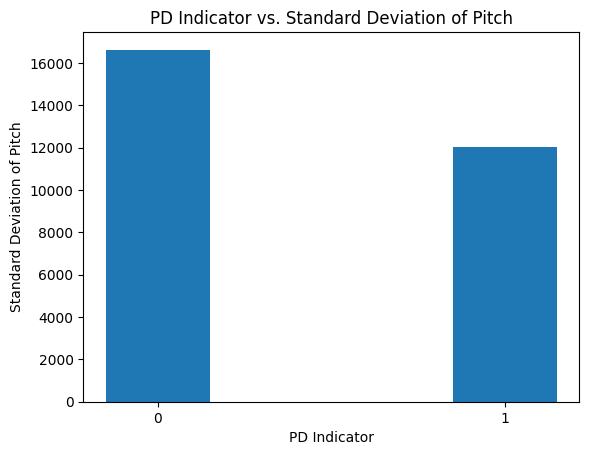

In [18]:
UPDRS_VS_variable('Standard Deviation of Pitch')
PD_VS_variable('Standard Deviation of Pitch')

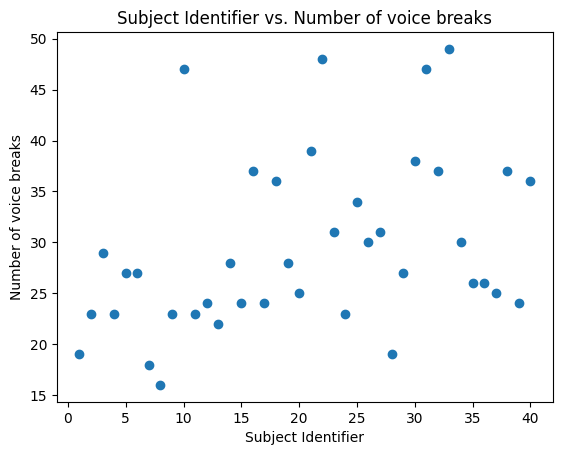

In [19]:
graph_with_calculation('Number of voice breaks')

Now in this graph we can see as we are moving towards Healthy persons Number of voice breaks are going up how ever it looks very strange that disease effected has less voice break than healthier which isn’t possible in real life but we have to tell that story which data is telling us without including our own assumptions
Now we verify Number of voice breaks with UPDRS and PD Indicator also

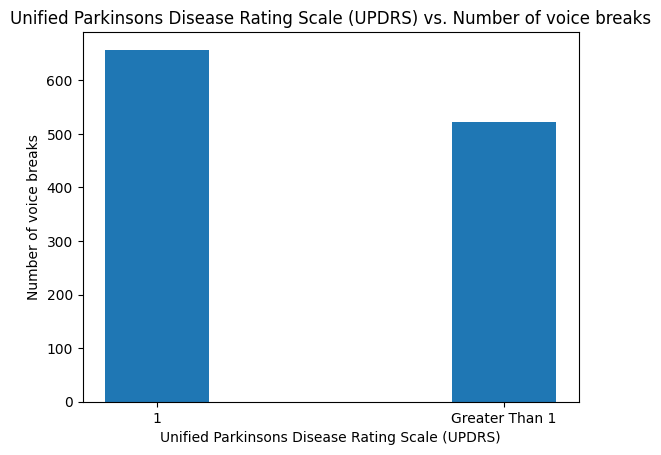

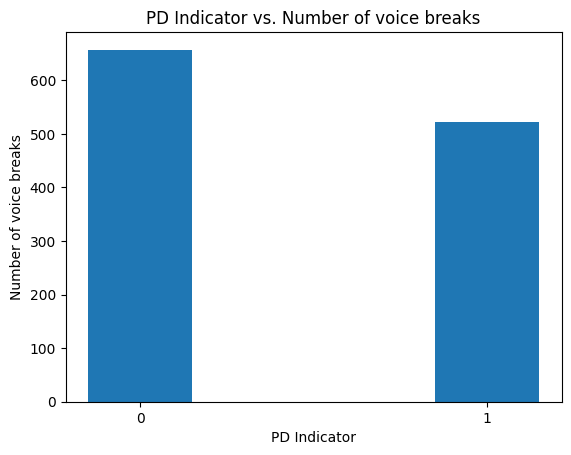

In [20]:
UPDRS_VS_variable('Number of voice breaks')
PD_VS_variable('Number of voice breaks')